In [2]:
#Importamos las librerias 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
g23=pd.read_csv('GyC23.csv')
g23=g23.drop(['Unnamed: 0'],axis=1)

In [4]:
g23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha        397 non-null    object 
 1   Folio        384 non-null    object 
 2   UUID         397 non-null    object 
 3   RFC          397 non-null    object 
 4   Proveedor    397 non-null    object 
 5   TIPO GASTO   397 non-null    object 
 6   Descripción  397 non-null    object 
 7   MP           397 non-null    object 
 8   FP           397 non-null    float64
 9   TC           397 non-null    float64
 10  Importe      397 non-null    float64
 11  IVA          397 non-null    float64
 12  RET ISR      397 non-null    float64
 13  RET IVA      397 non-null    float64
 14  Otros        397 non-null    int64  
 15  TOTAL MX     397 non-null    float64
 16  TOTAL SAT    397 non-null    float64
 17  Tipo         397 non-null    object 
 18  Status       397 non-null    object 
 19  Poliza  

In [5]:
cuantitativas = g23.iloc[:,8:17]
cuantitativas.info()

cualitativas = g23.iloc[:,[0,1,2,3,4,5,6,7,18,19]]
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FP         397 non-null    float64
 1   TC         397 non-null    float64
 2   Importe    397 non-null    float64
 3   IVA        397 non-null    float64
 4   RET ISR    397 non-null    float64
 5   RET IVA    397 non-null    float64
 6   Otros      397 non-null    int64  
 7   TOTAL MX   397 non-null    float64
 8   TOTAL SAT  397 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 28.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        397 non-null    object
 1   Folio        384 non-null    object
 2   UUID         397 non-null    object
 3   RFC          397 non-null    object
 4   Proveedor    397 non-null    object
 5   TIPO GAS

<Figure size 1500x800 with 0 Axes>

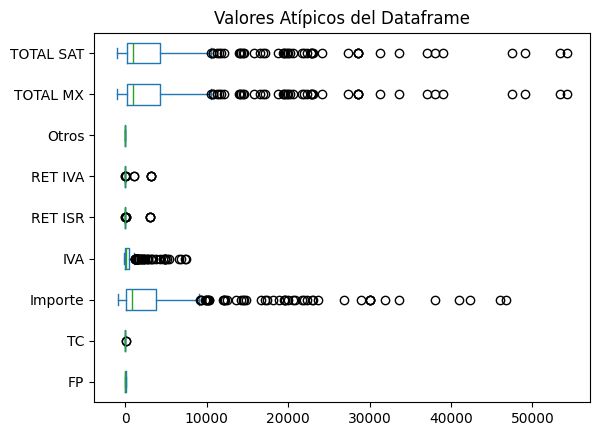

In [6]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [7]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP             188.098543
TC               4.957143
Importe      26557.244156
IVA           3761.774707
RET ISR        931.175004
RET IVA       1022.471745
Otros            0.000000
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: float64
Limite inferior permitido FP             -98.420961
TC              -2.774030
Importe     -18708.366775
IVA          -2766.954304
RET ISR       -869.142712
RET IVA       -947.124289
Otros            0.000000
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: float64


In [8]:
datag23= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
datag23

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0,14472.32,14472.32


In [9]:
valores_nulos=datag23.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      13
IVA          13
RET ISR       4
RET IVA       6
Otros         0
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [14]:
data_clean=datag23.copy()
data_clean=data_clean.fillna(round(datag23.mean(),1))
data_clean

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0,14472.32,14472.32


In [15]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [16]:
Datos_limpios = pd.concat([data_clean, cualitativas], axis=1)
Datos_limpios

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Status,Poliza
0,99.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,Vigente,NaN
1,99.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,Vigente,NaN
2,99.0,1.0,5551.38,888.22,0.0,0.0,0,6439.60,6439.60,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,Vigente,PE01-ENE23
3,99.0,1.0,5551.98,888.32,0.0,0.0,0,6440.30,6440.30,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,Vigente,PE02-ENE23
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0,9807.07,9807.07,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,Vigente,NaN
393,1.0,1.0,220.00,0.00,0.0,0.0,0,220.00,220.00,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,Vigente,NaN
394,3.0,1.0,18071.52,682.40,0.0,0.0,0,18753.92,18753.92,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,Vigente,NaN
395,5.0,1.0,14472.32,0.00,0.0,0.0,0,14472.32,14472.32,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,Vigente,NaN


In [17]:
Datos_limpios.to_csv('G23imputado.csv')